<a href="https://colab.research.google.com/github/blufury/Class-projects/blob/master/FinalProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn import tree
from scipy import stats

In [26]:
df = pd.read_csv('/content/student-mat_.csv')

#Encoding and Test Split

In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
imputer = SimpleImputer(strategy='mean')
df_encoded = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']
y_class = pd.cut(y, bins=[-1, 9, 20], labels=[0,1])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train_class = pd.cut(y_train, bins=[-1, 9, 20], labels=[0,1])
y_test_class = pd.cut(y_test, bins=[-1, 9, 20], labels=[0,1])

# Training

In [28]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lr = lin_reg.predict(X_test)

dt_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
dt_reg.fit(X_train, y_train)
y_pred_dt = dt_reg.predict(X_test)


# Model Performance


Model: Linear Regression
Mean Squared Error (MSE): 18.11
Mean Absolute Error (MAE): 3.50
R2 Score: 0.10
Accuracy: 0.62
Precision: 0.68
Recall: 0.81
F1-Score: 0.74
Confusion Matrix:
[[ 6 20]
 [10 43]]


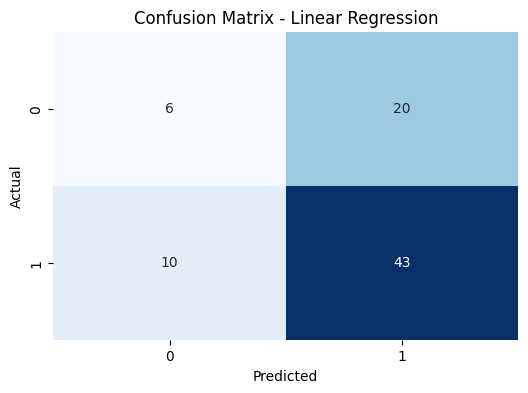


Model: Decision Tree
Mean Squared Error (MSE): 19.72
Mean Absolute Error (MAE): 3.37
R2 Score: 0.02
Accuracy: 0.72
Precision: 0.72
Recall: 0.96
F1-Score: 0.82
Confusion Matrix:
[[ 6 20]
 [ 2 51]]


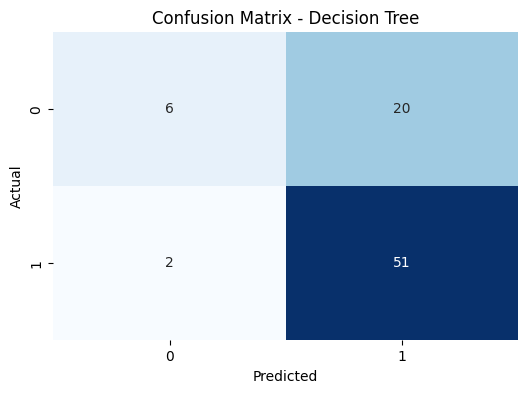

In [33]:
def evaluate_model(y_true, y_pred, y_true_class, y_pred_continuous, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    y_pred_class = pd.cut(y_pred_continuous, bins=[-1, 9, 20], labels=[0,1])
    acc = accuracy_score(y_true_class, y_pred_class)
    prec = precision_score(y_true_class, y_pred_class, zero_division=0)
    rec = recall_score(y_true_class, y_pred_class, zero_division=0)
    f1 = f1_score(y_true_class, y_pred_class, zero_division=0)
    cm = confusion_matrix(y_true_class, y_pred_class)

    print(f"\nModel: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R2 Score: {r2:.2f}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision: {prec:.2f}")
    print(f"Recall: {rec:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"Confusion Matrix:\n{cm}")

    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


evaluate_model(y_test, y_pred_lr, y_test_class, y_pred_lr, "Linear Regression")

evaluate_model(y_test, y_pred_dt, y_test_class, y_pred_dt, "Decision Tree")

# Visuals

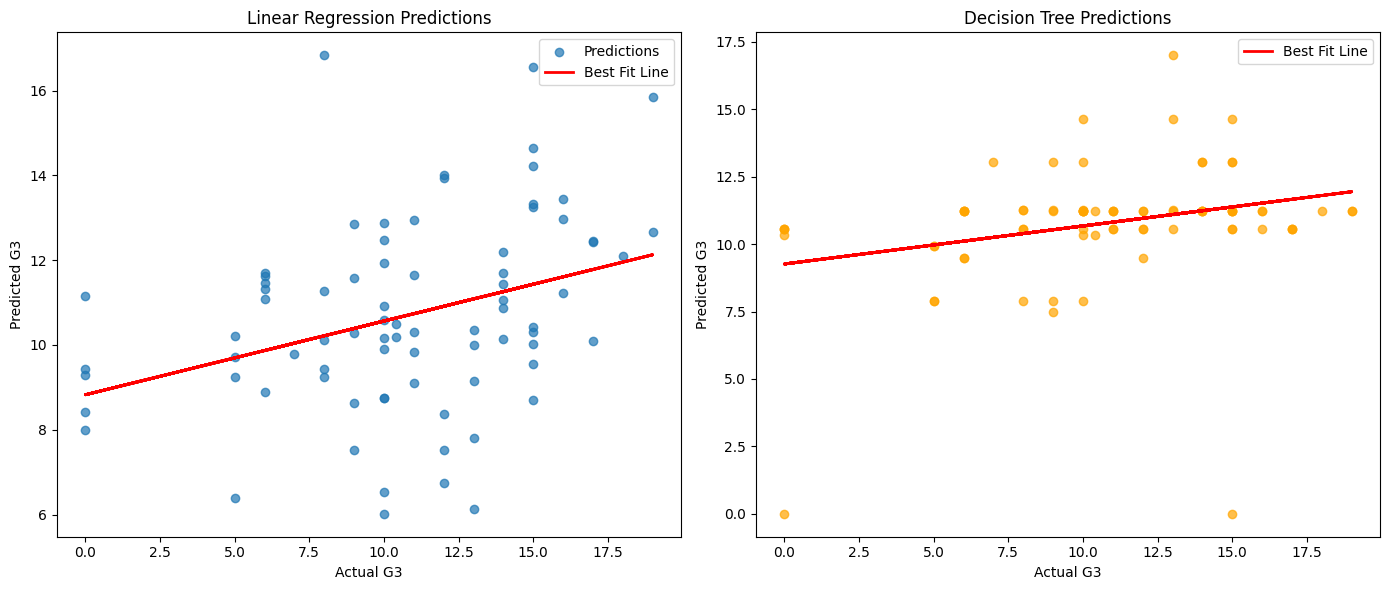

In [36]:
plt.figure(figsize=(14,6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.7, label='Predictions')
slope_lr, intercept_lr, _, _, _ = stats.linregress(y_test, y_pred_lr)
plt.plot(y_test, slope_lr*y_test + intercept_lr, color='red', lw=2, label='Best Fit Line')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Linear Regression Predictions")
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_dt, alpha=0.7, color='orange')
slope_dt, intercept_dt, _, _, _ = stats.linregress(y_test, y_pred_dt)
plt.plot(y_test, slope_dt*y_test + intercept_dt, color='red', lw=2, label='Best Fit Line')
plt.xlabel("Actual G3")
plt.ylabel("Predicted G3")
plt.title("Decision Tree Predictions")
plt.legend()

plt.tight_layout()
plt.show()


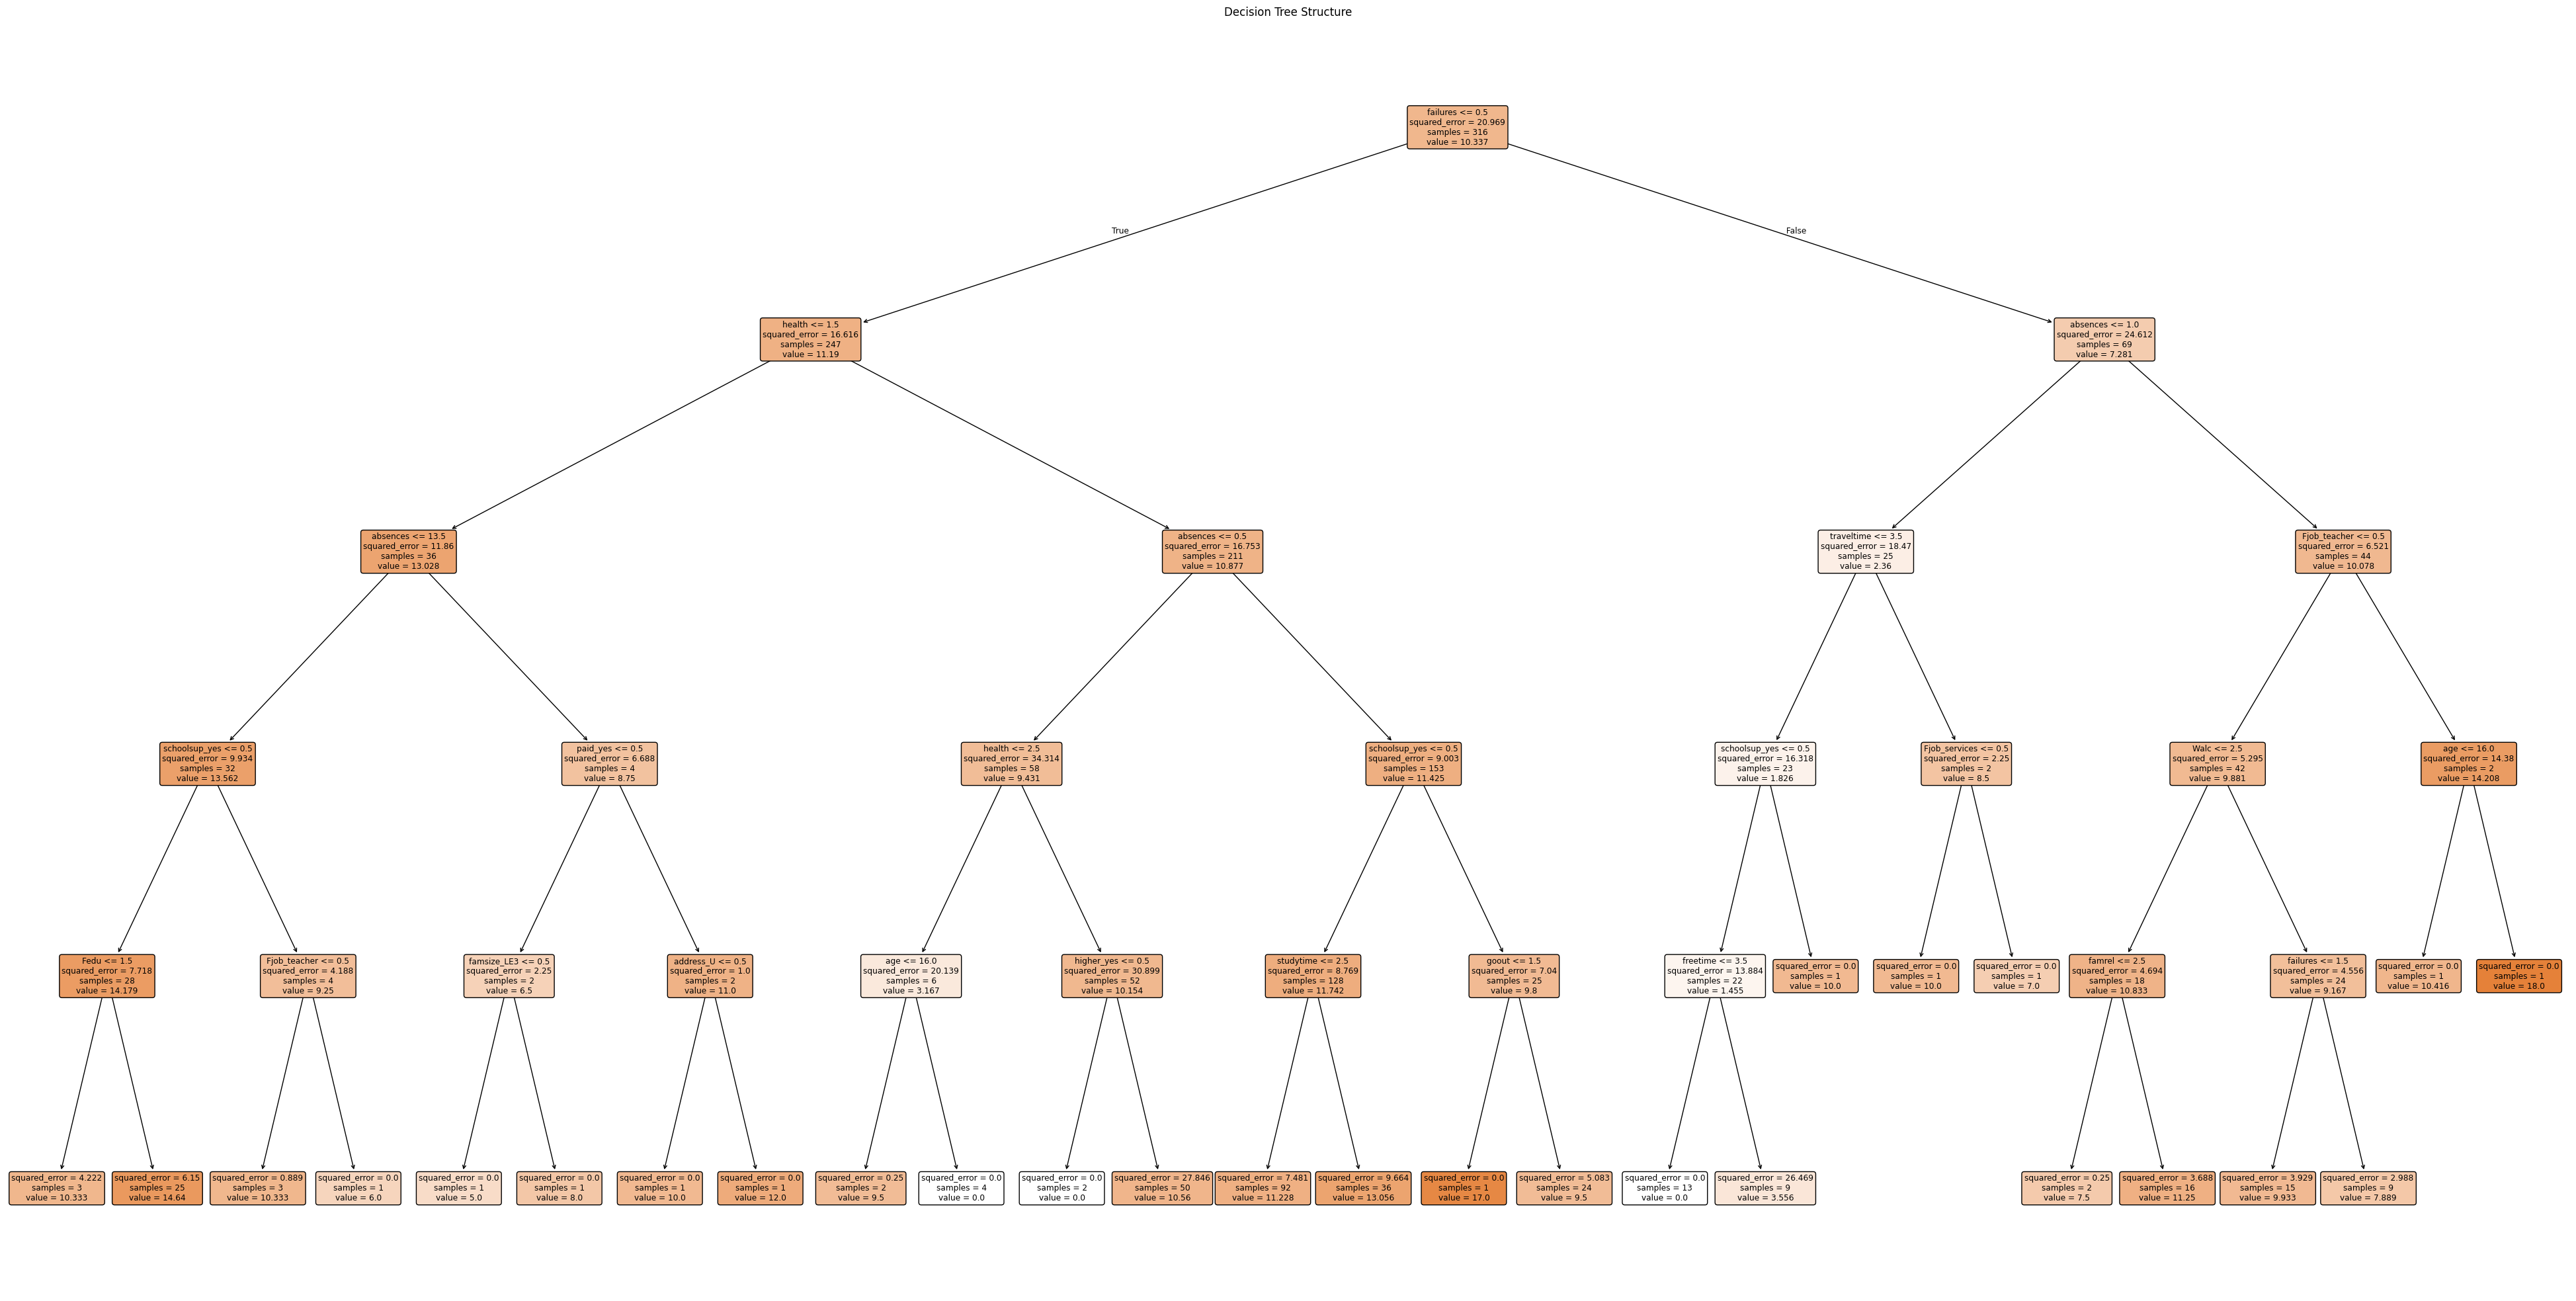

In [31]:
plt.figure(figsize=(50,25))
tree.plot_tree(dt_reg, feature_names=X.columns, filled=True, rounded=True)
plt.title("Decision Tree Structure")
plt.show()